Importing modules, as well as one built-in dataset from sklearn.

In [90]:
import numpy as np
import sklearn
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Loads the dataset, and also scales the digits down between -1 to 1 to make training easier

In [91]:
digits = load_digits()
data = scale(digits.data)
y = digits.target

Setting how many clusters there are and defining how many samples and features there are by taking it straight from the data

In [92]:
k = 10
samples, features = data.shape

Scoring function taken from sklearn website. The score comes from several different factors, each with its own generated y value as this is unsupervised learning.

In [93]:
def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

Randomly distrubutes the intial centroids (10 centroids because k=10). n_init=10 means that the random distribution of centroids happens ten times, then it picks the best distribution.

In [94]:
clf = KMeans(n_clusters=k, init="random", n_init=10)
bench_k_means(clf, "1", data)

1        	69659	0.679	0.719	0.699	0.570	0.696	0.144


Plotting the clusters:

I first make sure the data is in two dimensions so it is able to be visualised in a chart like this.

Using this reduced data I made a scatter plot and addded markers for where the centroids are. The different clusters are also marked by their different colours.

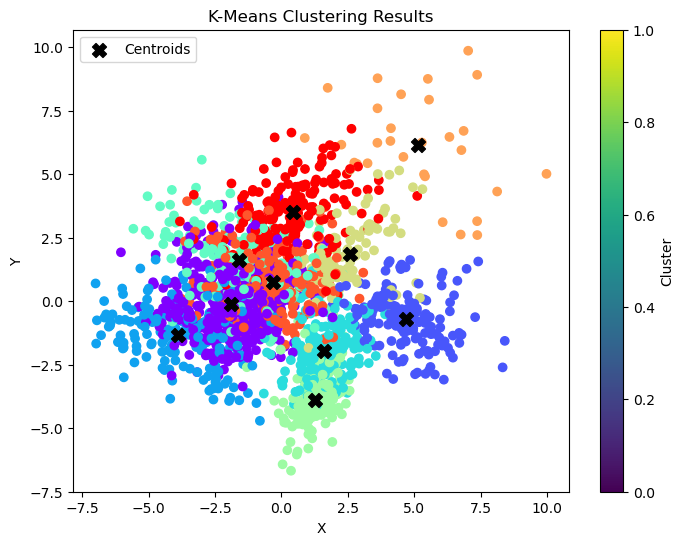

In [95]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Scatter plot of the data points with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clf.labels_, cmap='rainbow')
plt.title("K-Means Clustering Results")
plt.xlabel("X")
plt.ylabel("Y")

# Plot centroids with X marker
centroids = pca.transform(clf.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='black', label='Centroids')
plt.legend()

plt.colorbar(label='Cluster')
plt.show()